# CNN Model (any images)

['class-2', 'class-1']
[[[177 183 182]
  [164 170 169]
  [200 206 205]
  ...
  [146 151 150]
  [133 138 137]
  [126 131 130]]

 [[185 191 190]
  [166 172 171]
  [156 162 161]
  ...
  [136 141 140]
  [126 131 130]
  [118 123 122]]

 [[169 175 174]
  [104 110 109]
  [120 126 125]
  ...
  [139 144 143]
  [113 118 117]
  [136 141 140]]

 ...

 [[ 91  92  90]
  [138 139 137]
  [ 85  86  84]
  ...
  [ 51  52  48]
  [ 51  52  48]
  [175 176 174]]

 [[141 142 140]
  [141 142 140]
  [ 88  89  87]
  ...
  [159 160 156]
  [153 154 150]
  [157 158 156]]

 [[ 82  83  81]
  [ 87  88  86]
  [119 120 118]
  ...
  [ 29  30  26]
  [ 56  57  53]
  [ 98  99  97]]]
(251, 201, 3)


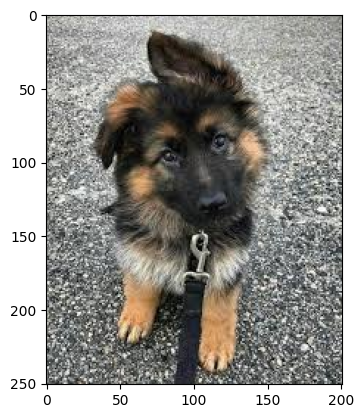

In [13]:

import numpy as np
np.set_printoptions (linewidth=np.inf)
import cv2
import imghdr
from matplotlib import pyplot as plt
data_location = './drive/MyDrive/Colab Dataset/Data/'
import os
print (os.listdir (data_location))
img = cv2.imread(os.path.join(data_location, 'class-1/images10.jpg'))
print(img)
print(img.shape)
plt.imshow(img)
#Opencv tarnslate as BGR but we need RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cleaning data from unexpected extention

In [19]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_location):
    for image in os.listdir(os.path.join(data_location, image_class)):
        image_path = os.path.join(data_location, image_class, image)
        try:
            #ing = cv2.imread(image_path)
            image_extension = imghdr.what(image_path)
            if image_extension not in image_extensions:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            # os.remove(image_path)

# Convert files to dataset

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
data_location= './drive/MyDrive/Colab Dataset/Data/'
data = tf.keras.utils.image_dataset_from_directory (data_location)
# data = tf.keras.utils.image_dataset_from_directory(data_location, batch_size=10)

Found 311 files belonging to 2 classes.


In [23]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data_iterator = data.as_numpy_iterator()

# Data normalization

In [ ]:
tuple_data_index = 0
tuple_label_index = 1
#But it works only for batch
scaled = batch[tuple_data_index]/255
print(f'Scaled min: {scaled.min()}')
print(f'Scaled max: {scaled.max()}')

In [24]:

data = data.map(lambda x,y: (x/255, y))

In [25]:
data_scaled_iterator = data.as_numpy_iterator()

Batch scaled max: 1.0
Batch scaled min: 0.0


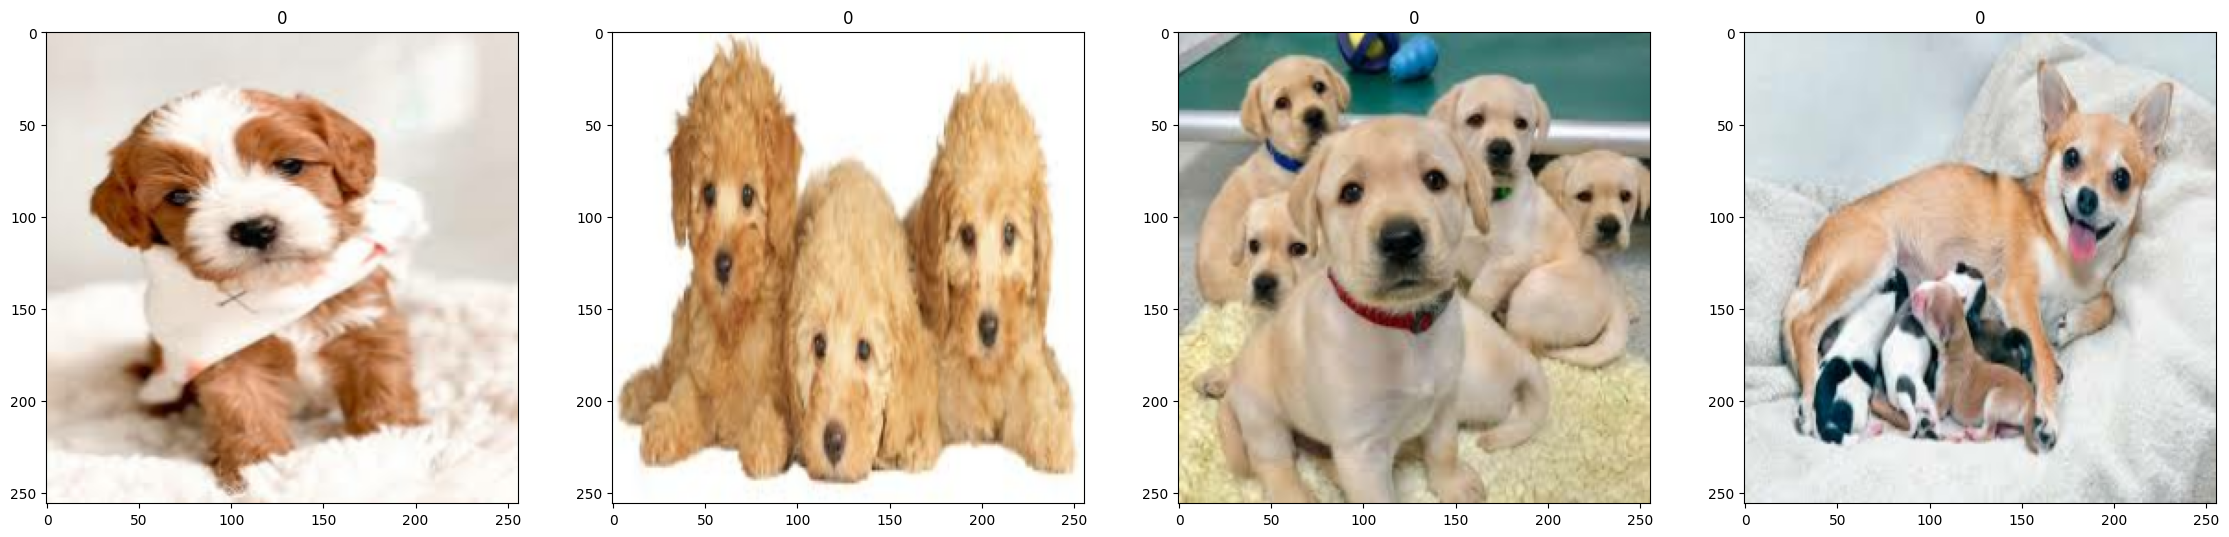

In [28]:
tuple_data_index = 0
tuple_label_index = 1
scaled_batch = data_scaled_iterator.next()
print(f'Batch scaled max: {scaled_batch [tuple_data_index].max()}')
print(f'Batch scaled min: {scaled_batch [tuple_data_index].min()}')
column_count = 4
fig, ax = plt.subplots (ncols=column_count, figsize=(28,20))
for idx, img in enumerate (scaled_batch[tuple_data_index][:column_count]):
  ax [idx].imshow(img)
  ax [idx].title.set_text(scaled_batch [tuple_label_index] [idx])

In [30]:
print(f'Full data length (batch): {len(data)}')

Full data length (batch): 10


# Split data

## Calculate sizes

In [31]:

train_size = round(len(data)*.7)
val_size = round(len(data)*.2)
test_size = round(len(data)*.1)
print(f'train_size: {train_size}')
print(f'val_size: {val_size}')
print(f'test_size: {test_size}')

train_size: 7
val_size: 2
test_size: 1


## Data split

In [32]:
train = data.take(train_size)
val = data. skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train))
print(len(val))
print(len(test))

7
2
1


# CNN Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 30, 30, 16)      

## Training

In [50]:
log_location = './drive/MyDrive/Colab Notebooks/logs/cnn_training_logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_location)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 28s 4s/step - loss: 0.9643 - accuracy: 0.5804 - val_loss: 0.6088 - val_accuracy: 0.7031
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.5504 - accuracy: 0.7634 - val_loss: 0.4948 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.5083 - accuracy: 0.7679 - val_loss: 0.4755 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 0.4753 - accuracy: 0.7679 - val_loss: 0.4381 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 18s 2s/step - loss: 0.4480 - accuracy: 0.7857 - val_loss: 0.4284 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.4073 - accuracy: 0.8438 - val_loss: 0.4384 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 0.3055 - accuracy: 0.8973 - val_loss: 0.2764 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================